In [23]:
import pandas as pd
from datetime import datetime


**Data Preprocessing DD--MM--YYYY and fillNA**

In [24]:
def fill_missing_days(file_path, sheet_name='Sheet1', day_column='Day'):
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Convert the day column to datetime
    df[day_column] = pd.to_datetime(df[day_column], errors='coerce')
    
    # Drop rows where the day column is invalid
    df = df.dropna(subset=[day_column])
    
    # Sort the dataframe by the day column
    df = df.sort_values(by=day_column).reset_index(drop=True)
    
    # Create a complete date range from the start to the end
    full_date_range = pd.date_range(start=df[day_column].min(), end=df[day_column].max(), freq='D')
    
    # Reindex the dataframe to the full date range
    df = df.set_index(day_column).reindex(full_date_range)
    
    # Reset the index and rename the date index back to the day column
    df.reset_index(inplace=True)
    df.rename(columns={'index': day_column}, inplace=True)
    
    # Fill NA in other columns
    df.iloc[:, 1:] = df.iloc[:, 1:].fillna('NA')
    
    # Count the number of inserted rows
    rows_inserted = df.isnull().sum().sum() // (len(df.columns) - 1)
    
    # Save the updated dataframe back to Excel
    output_file = "/kaggle/working/bantwal-flow.xlsx"
    df.to_excel(output_file, index=False)
    
    return rows_inserted, output_file

# Example usage
file_path = '/kaggle/input/bantwal-fin/Bantwal-final.xlsx'  # Replace with your Excel file path
rows_inserted, output_file = fill_missing_days(file_path)
print(f'Rows inserted: {rows_inserted}')
print(f'Updated file saved to: {output_file}')


Rows inserted: 0
Updated file saved to: /kaggle/working/bantwal-flow.xlsx


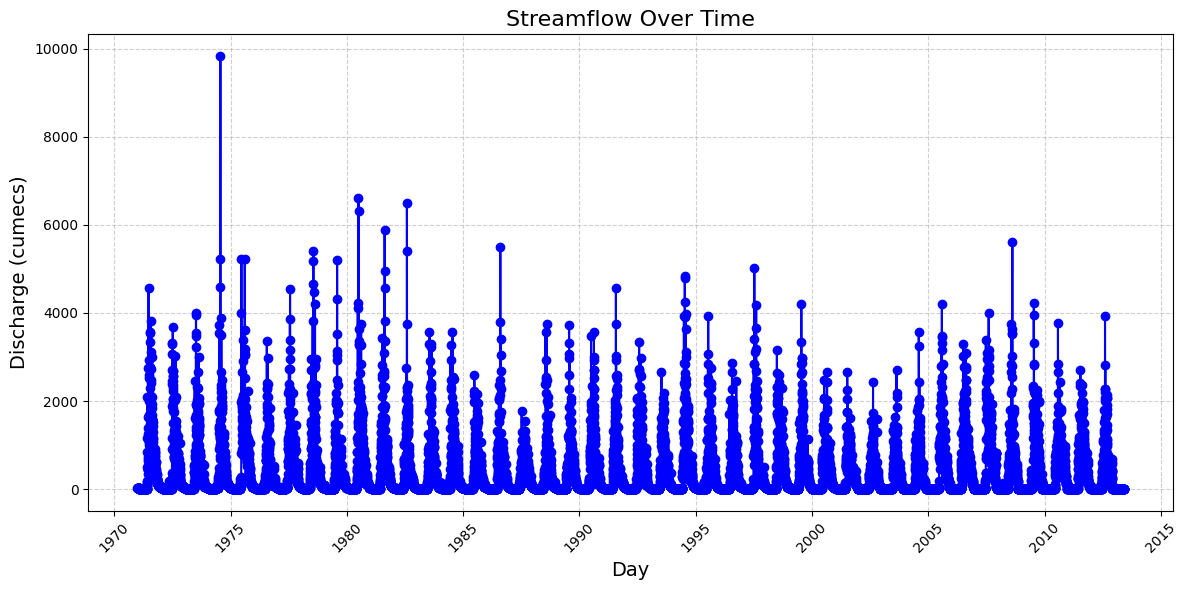

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_streamflow(file_path,day_column='Day', discharge_column='Discharge(cumecs)'):
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Convert the day column to datetime
    df[day_column] = pd.to_datetime(df[day_column], errors='coerce')
    
    # Drop rows with invalid dates or missing discharge values
    df = df.dropna(subset=[day_column, discharge_column])
    
    # Sort the dataframe by the day column
    df = df.sort_values(by=day_column)
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(df[day_column], df[discharge_column], marker='o', linestyle='-', color='blue')
    plt.title('Streamflow Over Time', fontsize=16)
    plt.xlabel('Day', fontsize=14)
    plt.ylabel('Discharge (cumecs)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent overlap
    
    # Save the plot as an image (optional)
    plt.savefig('streamflow_plot.png')
    
    # Show the plot
    plt.show()

# Example usage
file_path = '/kaggle/input/bantwal-fin/Bantwal-final.xlsx'  # Replace with your Excel file path
plot_streamflow(file_path)


'/kaggle/working/streamflow_plot.png'

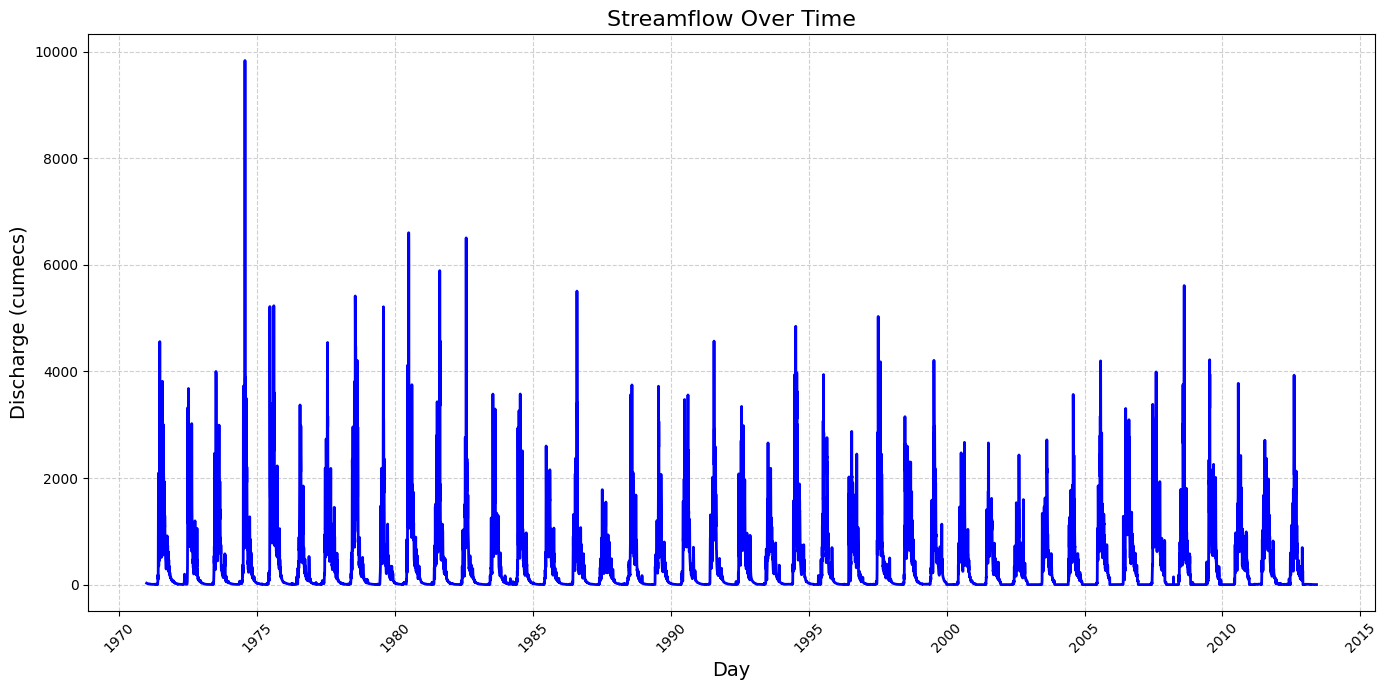

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_streamflow(file_path, day_column='Day', discharge_column='Discharge(cumecs)'):
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Convert the day column to datetime
    df[day_column] = pd.to_datetime(df[day_column], errors='coerce')
    
    # Drop rows with invalid dates or missing discharge values
    df = df.dropna(subset=[day_column, discharge_column])
    
    # Sort the dataframe by the day column
    df = df.sort_values(by=day_column)
    
    # Plot the data
    plt.figure(figsize=(14, 7))
    plt.plot(df[day_column], df[discharge_column], marker='', linestyle='-', color='blue', linewidth=2)
    plt.title('Streamflow Over Time', fontsize=16)
    plt.xlabel('Day', fontsize=14)
    plt.ylabel('Discharge (cumecs)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()  # Adjust layout to prevent overlap
    
    # Save the plot as an image
    output_path = '/kaggle/working/streamflow_plot.png'
    plt.savefig(output_path)
    
    return output_path

# Example usage
file_path = '/kaggle/input/bantwal-fin/Bantwal-final.xlsx'  # Replace with the uploaded Excel file path
plot_streamflow(file_path)


**Data Preprocessing Monthly Data**

In [27]:
import pandas as pd

# File paths
input_file = '/kaggle/input/bantwal-fin/Bantwal-final.xlsx'
output_file = '/kaggle/working/monthly-bantwal-flow.xlsx'

# Read the Excel sheet
df = pd.read_excel(input_file)

# Ensure 'Day' column is in datetime format
df['Day'] = pd.to_datetime(df['Day'], errors='coerce')

# Drop rows where 'Day' or 'Discharge(cumecs)' is NaN
# df = df.dropna(subset=['Day', 'Discharge(cumecs)'])

# Extract year and month from 'Day' column
df['Year'] = df['Day'].dt.year
df['Month'] = df['Day'].dt.month

# Group by year and month, summing up the 'Discharge(cumecs)'
monthly_summary = (
    df.groupby(['Year', 'Month'], as_index=False)['Discharge(cumecs)']
    .sum()
    .rename(columns={'Discharge(cumecs)': 'Monthly Discharge(cumecs)'})
)

# Save the result to a new Excel file
monthly_summary.to_excel(output_file, index=False)

print(f"Monthly summary saved to {output_file}")


Monthly summary saved to /kaggle/working/monthly-bantwal-flow.xlsx


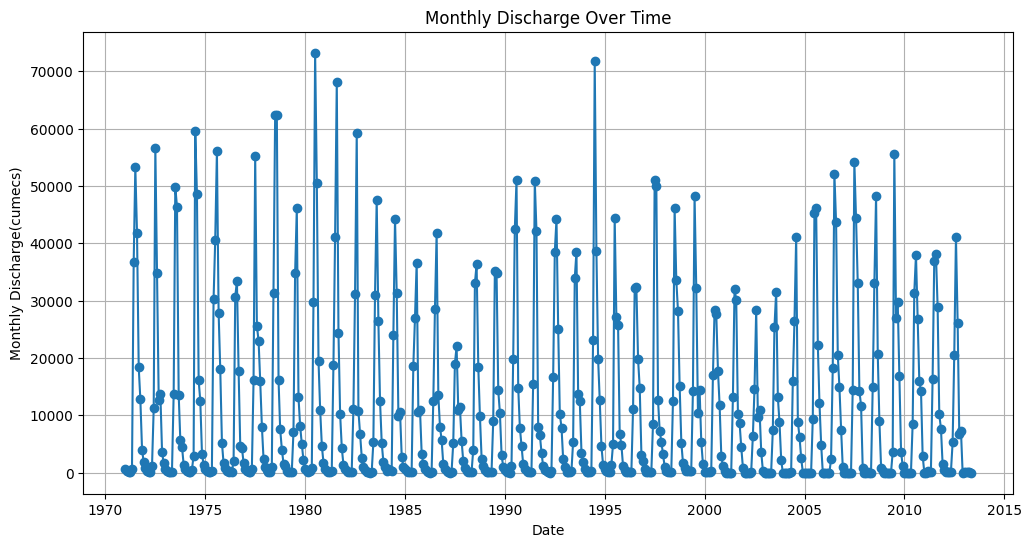

<Figure size 640x480 with 0 Axes>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Excel
file_path ="/kaggle/input/monthly-bantwal/updated_bantwal (1).xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Combine Year and Month into a single Date column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Sort the data by Date (if not already sorted)
data.sort_values('Date', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Monthly Discharge(cumecs)'], marker='o', linestyle='-')
plt.title('Monthly Discharge Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Discharge(cumecs)')
plt.grid()
plt.show()

output_path = '/kaggle/working/streamflow_plot_monthly.png'
plt.savefig(output_path)

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Excel
file_path = "/kaggle/input/monthly-bantwal/updated_bantwal (1).xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Combine Year and Month into a single Date column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Sort the data by Date (if not already sorted)
data.sort_values('Date', inplace=True)

# Create a folder to save the plots if it doesn't exist
output_folder = '/kaggle/working/yearly_plots/'
os.makedirs(output_folder, exist_ok=True)

# Loop through each year and plot
for year in data['Year'].unique():
    # Filter data for the current year
    year_data = data[data['Year'] == year]
    
    # Plot
    plt.figure(figsize=(24, 12))
    plt.plot(year_data['Date'], year_data['Monthly Discharge(cumecs)'], marker='o', linestyle='-')
    plt.title(f'Monthly Discharge for {year}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Discharge (cumecs)')
    plt.grid()
    
    # Save the plot as a PNG file with the year as the file name
    plt.savefig(os.path.join(output_folder, f'{year}.png'), dpi=300)
    plt.close()  # Close the plot to free up memory for the next plot


**NEW DATASET**

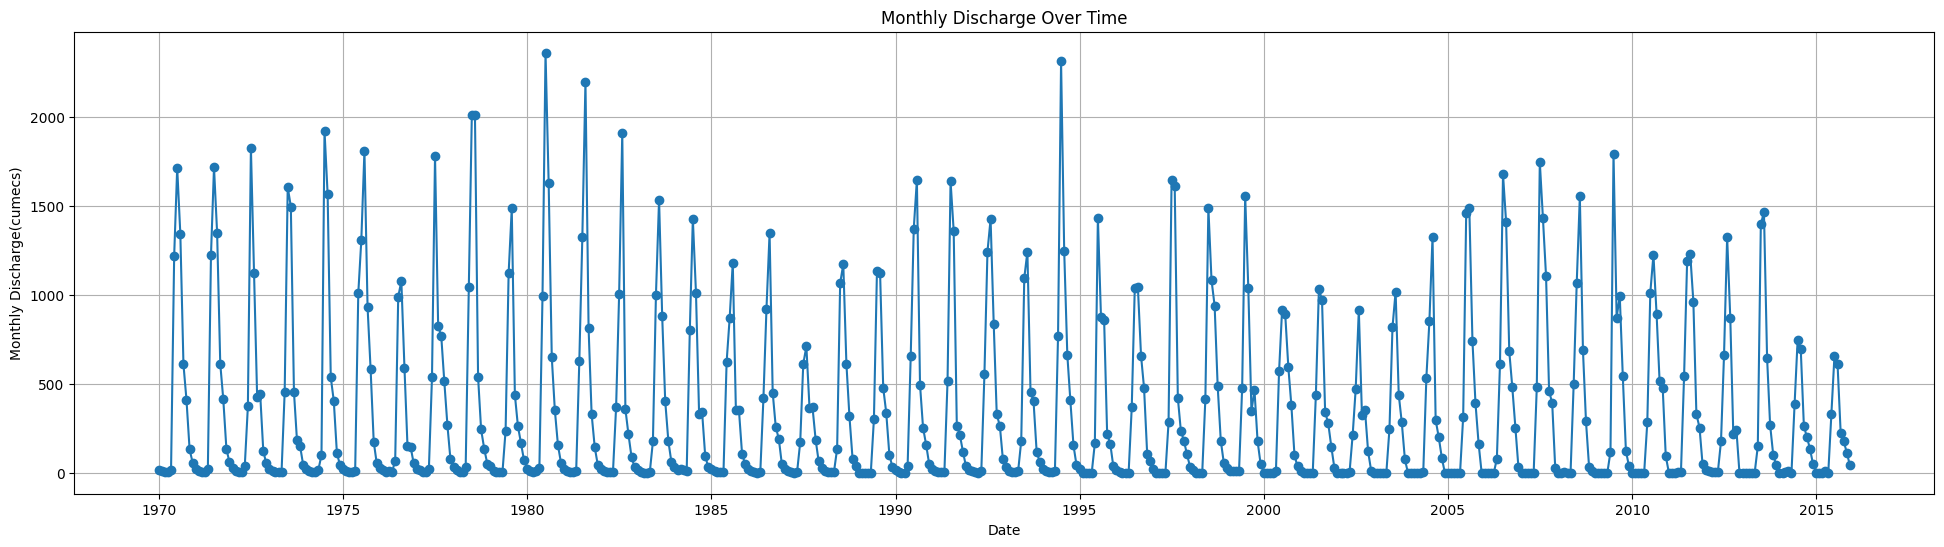

<Figure size 640x480 with 0 Axes>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# file_path = "/kaggle/input/nethravathi-dataset-new/Nethravathi Dataset.xlsx"  # Replace with your file path
file_path = "/kaggle/input/2015-nethravathi/Nethravathi Dataset-2015.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)
data.sort_values('Date', inplace=True)

# Plot
plt.figure(figsize=(24, 6))
plt.plot(data['Date'], data['Streamflow (m3/s)'], marker='o', linestyle='-')
plt.title('Monthly Discharge Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Discharge(cumecs)')
plt.grid()
plt.show()

output_path = '/kaggle/working/streamflow_plot_monthly.png'
plt.savefig(output_path)

In [31]:

df=data
streamflow_range = df['Streamflow (m3/s)'].agg(['min', 'max'])
print(f"Streamflow Range: \n{streamflow_range}\n")
    
# Display the frequency distribution of the streamflow
streamflow_freq = pd.cut(df['Streamflow (m3/s)'], bins=20).value_counts().sort_index()
print(f"Streamflow Frequency Distribution (with ranges): \n{streamflow_freq}\n")
# Optionally, you can create a table to display the range and frequency
distribution_df = pd.DataFrame({
  'Range': streamflow_freq.index,
  'Frequency': streamflow_freq.values
    })
    
print("Streamflow Distribution Table:")
print(distribution_df)
zero_streamflow_count = (df['Streamflow (m3/s)'] == 0).sum()
print(f"Number of rows with streamflow equal to 0: {zero_streamflow_count}")

Streamflow Range: 
min       0.000000
max    2363.083871
Name: Streamflow (m3/s), dtype: float64

Streamflow Frequency Distribution (with ranges): 
Streamflow (m3/s)
(-2.363, 118.154]       293
(118.154, 236.308]       44
(236.308, 354.463]       36
(354.463, 472.617]       32
(472.617, 590.771]       22
(590.771, 708.925]       19
(708.925, 827.079]        9
(827.079, 945.234]       15
(945.234, 1063.388]      16
(1063.388, 1181.542]     11
(1181.542, 1299.696]      9
(1299.696, 1417.85]      11
(1417.85, 1536.005]      10
(1536.005, 1654.159]     10
(1654.159, 1772.313]      4
(1772.313, 1890.467]      4
(1890.467, 2008.621]      2
(2008.621, 2126.775]      2
(2126.775, 2244.93]       1
(2244.93, 2363.084]       2
Name: count, dtype: int64

Streamflow Distribution Table:
                   Range  Frequency
0      (-2.363, 118.154]        293
1     (118.154, 236.308]         44
2     (236.308, 354.463]         36
3     (354.463, 472.617]         32
4     (472.617, 590.771]         22


In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/kaggle/input/nethravathi-dataset-new/Nethravathi Dataset.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)
data.sort_values('Date', inplace=True)

# Extract year and month from the 'Date' column
data['Year'] = data['Date'].dt.year

# Create output directory
output_dir = '/kaggle/working/yearwise_plots/'
os.makedirs(output_dir, exist_ok=True)

# Group by year and plot monthly discharge for each year
for year, group in data.groupby('Year'):
    plt.figure(figsize=(12, 6))
    plt.plot(group['Date'], group['Streamflow (m3/s)'], marker='o', linestyle='-', label=f"Year {year}")
    plt.title(f'Monthly Discharge for Year {year}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Discharge (cumecs)')
    plt.grid()
    plt.legend()

    # Save the plot for the year
    output_path = os.path.join(output_dir, f'streamflow_plot_{year}.png')
    plt.savefig(output_path)
    plt.close()

print(f"Plots saved in {output_dir}")


Plots saved in /kaggle/working/yearwise_plots/


**DATASET PREPARATION FOR MODEL**

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('/kaggle/input/2015-nethravathi/Nethravathi Dataset-2015.xlsx')
# df = pd.read_excel('/kaggle/input/nethravathi-dataset-new/Nethravathi Dataset.xlsx')
df = df.sort_values('Date')
# df.to_excel('updated_bantwal.xlsx', index=False)
scaler = MinMaxScaler(feature_range=(0, 1))
df['Discharge'] = scaler.fit_transform(df['Streamflow (m3/s)'].values.reshape(-1, 1))
df.tail(15)



,Date,Rainfall (mm),Tmax_avg (oC),Tmin_avg (oC),T_mean (oC),Streamflow (m3/s),Discharge
537,2014-10-01,201.39,29.370968,20.458065,24.914516,200.527419,0.084858
538,2014-11-01,37.04,29.876667,18.356667,24.116667,133.514667,0.056500
539,2014-12-01,20.37,29.806452,17.554839,23.680645,47.148710,0.019952
540,2015-01-01,0.00,30.303226,15.603226,22.953226,0.000000,0.000000
541,2015-02-01,0.00,32.050000,16.657143,24.353571,0.000000,0.000000
542,2015-03-01,0.00,32.809677,19.774194,26.291935,0.000000,0.000000
543,2015-04-01,0.00,32.896667,21.110000,27.003333,8.000000,0.003385
544,2015-05-01,0.00,32.232258,22.161290,27.196774,0.000000,0.000000
545,2015-06-01,614.00,28.316667,21.153333,24.735000,329.521200,0.139445
546,2015-07-01,1247.99,27.835484,21.158065,24.496774,655.535200,0.277407


In [34]:
def create_dataset(df, look_back=12):
    X, y ,date = [], [],[]
    for i in range(len(df) - look_back):
        X.append(df[i:(i + look_back), 0])
        y.append(df[i + look_back, 0])
        date.append(df[i + look_back, 1])
        
    return np.array(X), np.array(y),np.array(date)


In [35]:
import numpy as np
data = df[['Discharge','Date']].values
data = data.reshape(-1, 2)
look_back = 12  # For example, use 12 months to predict the next month's discharge
X, y ,date= create_dataset(data, look_back)

In [36]:
X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
y = y.astype(np.float32)

In [37]:
X.shape

(540, 12, 1)

In [38]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
date_train, date_test = date[:train_size], date[train_size:]


In [39]:
import pandas as pd
import numpy as np

# Reshape X_train to 2D (flatten the 3D array into 2D)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Combine X_train_reshaped and y_train into a single DataFrame
train_df = pd.DataFrame(X_train_reshaped)
train_df['Target'] = y_train

# Display the resulting DataFrame
print(train_df.head())


          0         1         2         3         4         5         6  \
0  0.006458  0.003349  0.000826  0.000578  0.006937  0.516715  0.725898   
1  0.003349  0.000826  0.000578  0.006937  0.516715  0.725898  0.569184   
2  0.000826  0.000578  0.006937  0.516715  0.725898  0.569184  0.258153   
3  0.000578  0.006937  0.516715  0.725898  0.569184  0.258153  0.173533   
4  0.006937  0.516715  0.725898  0.569184  0.258153  0.173533  0.055364   

          7         8         9        10        11    Target  
0  0.569184  0.258153  0.173533  0.055364  0.024196  0.007728  
1  0.258153  0.173533  0.055364  0.024196  0.007728  0.004619  
2  0.173533  0.055364  0.024196  0.007728  0.004619  0.002095  
3  0.055364  0.024196  0.007728  0.004619  0.002095  0.001848  
4  0.024196  0.007728  0.004619  0.002095  0.001848  0.008189  


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


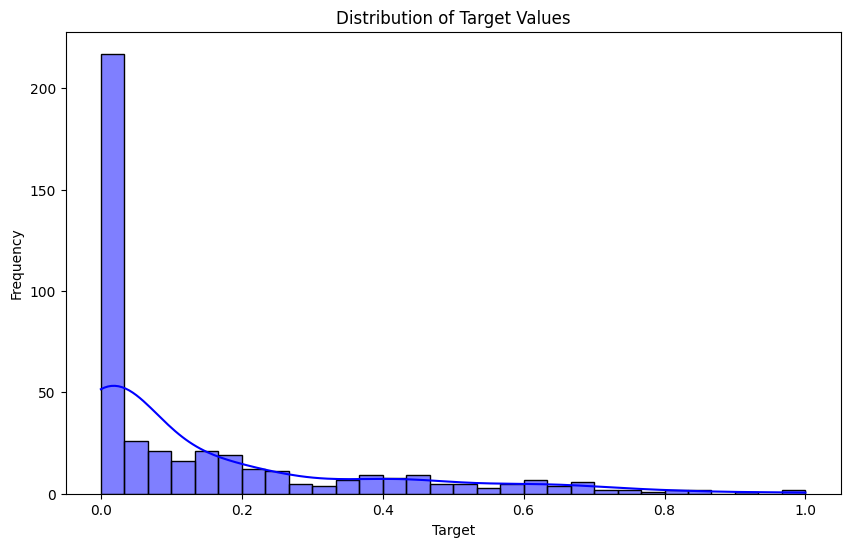

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the 'Target' column
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Target'], kde=True, bins=30, color='blue')

# Adding labels and title
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Frequency')

# Show plot
plt.show()


Target
0.697231    12
0.000000    12
0.360837     8
0.727168     8
0.397326     6
            ..
0.170489     1
0.526399     1
0.056634     1
0.174803     1
0.201930     1
Name: count, Length: 196, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


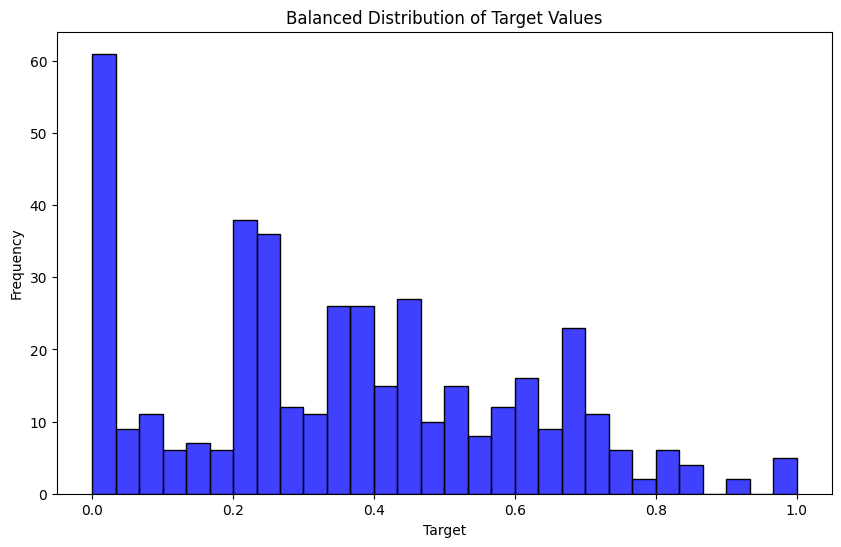

In [43]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the dataset into majority (Target == 0), minority (Target != 0), and Target > 0.6
majority_class = train_df[train_df['Target'] <= 0.2]
minority_class = train_df[train_df['Target'] >0.2]
high_target_class = train_df[train_df['Target'] > 0.6]

# Downsample majority class (Target == 0) to match the size of the minority class
majority_downsampled = resample(majority_class, 
                                replace=False,    # No replacement
                                n_samples=100,  # Match the minority class size or any desired value
                                random_state=42)  # For reproducibility

# Upsample minority class (Target != 0) to match the size of the majority class
minority_upsampled = resample(minority_class, 
                               replace=True,     # With replacement
                               n_samples=len(majority_class),  # Match the majority class size
                               random_state=42)  # For reproducibility

# # Upsample values where Target > 0.6
# high_target_upsampled = resample(high_target_class, 
#                                  replace=True,     # With replacement
#                                  n_samples=30,  # Match the majority class size
#                                  random_state=42)  # For reproducibility

# Combine the downsampled majority class, upsampled minority class, and high Target class
balanced_df = pd.concat([majority_downsampled, minority_upsampled])

# Shuffle the dataset to mix the samples
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class distribution
print(balanced_df['Target'].value_counts())

# Optionally, plot the distribution again
plt.figure(figsize=(10, 6))
sns.histplot(balanced_df['Target'], kde=False, bins=30, color='blue')
plt.title('Balanced Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


In [44]:
X_balanced = balanced_df.drop(columns='Target')
X_train = X_balanced.values.reshape(X_balanced.shape[0], look_back, 1)
y_balanced = balanced_df['Target']
y_train=y_balanced.values

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from keras import backend as K


# Define custom metric for RMSE
def rmse_metric(y_true, y_pred):
    return tf.math.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))  # Use tf.math.sqrt and tf.reduce_mean



In [46]:


# # Build the model
# model = Sequential()

# # First LSTM layer
# model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# # Second LSTM layer
# model.add(LSTM(100, return_sequences=True))

# # Third LSTM layer
# model.add(LSTM(100, return_sequences=False))

# # Add a dropout layer for regularization
# model.add(Dropout(0.2))

# # Output layer with ReLU activation to ensure non-negative outputs
# model.add(Dense(1, activation='relu'))

# # Compile the model with Adam optimizer
# model.compile(
#     optimizer='adam',
#     loss='mean_squared_error',
    
# )

# # Model summary for confirmation
# model.summary()


In [47]:
pip install optuna


/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [48]:
# import optuna
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense
# from tensorflow.keras.optimizers import Adam

# # Define the objective function to optimize
# def objective(trial):
#     # Define the hyperparameters to optimize
#     n_layers = trial.suggest_int('n_layers', 1, 5)  # Number of LSTM layers (1 to 5)
#     units = trial.suggest_int('units', 20, 120)  # Number of units in each LSTM layer
#     dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)  # Dropout rate (0.0 to 0.5)
#     learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)  # Learning rate (log scale)

#     # Build the model
#     model = Sequential()

#     # Add LSTM layers
#     model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    
#     for _ in range(n_layers - 1):  # Add remaining LSTM layers
#         model.add(LSTM(units=units, return_sequences=True))
        

#     model.add(LSTM(units=units, return_sequences=False))  # Final LSTM layer (no sequences)

#     # Dropout layer for regularization
#     model.add(Dropout(rate=dropout_rate))

#     # Output layer
#     model.add(Dense(1, activation='relu'))

#     # Compile the model
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

#     # Fit the model and return the validation loss
#     history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
#     val_loss = history.history['val_loss'][-1]
#     return val_loss

# # Create a study object for Bayesian Optimization
# study = optuna.create_study(direction='minimize')  # Minimize validation loss

# # Optimize the objective function over 20 trials
# study.optimize(objective, n_trials=100)

# # Display the best hyperparameters and the corresponding validation loss
# print("Best hyperparameters: ", study.best_params)
# print("Best validation loss: ", study.best_value)


In [49]:


# # Get the best model parameters and build the final model
# best_params = study.best_trial.params
# model = Sequential()

# # Build the best model based on optimized hyperparameters
# model.add(LSTM(best_params['units'], return_sequences=True, input_shape=(X_train.shape[1], 1)))

# for _ in range(best_params['n_layers'] - 1):
#     model.add(LSTM(best_params['units'], return_sequences=True))

# model.add(LSTM(best_params['units'], return_sequences=False))
# model.add(Dropout(best_params['dropout_rate']))
# model.add(Dense(1, activation='relu'))

# model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')

# # Final model summary
# model.summary()



In [50]:


# Build the model
model = Sequential()

# First LSTM layer
model.add(LSTM(40, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Second LSTM layer
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(40, return_sequences=True))

# Third LSTM layer
model.add(LSTM(40, return_sequences=False))

# Add a dropout layer for regularization
model.add(Dropout(0.25))

# Output layer with ReLU activation to ensure non-negative outputs
model.add(Dense(1, activation='relu'))

# Compile the model with Adam optimizer
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    
)

# Model summary for confirmation
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 40)              │           6,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 40)              │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 12, 40)              │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 40)                  │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,641 (178.29 KB)

 Trainable params: 45,641 (178.29 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# EarlyStopping callback: stops training if validation loss doesn't improve for 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# ModelCheckpoint callback: saves the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=32, 
          validation_data=(X_test, y_test),
          callbacks=[early_stopping, checkpoint])


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.1877 - val_loss: 0.0440
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0693 - val_loss: 0.0594
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0613 - val_loss: 0.1035
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0505 - val_loss: 0.0648
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0460 - val_loss: 0.0412
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0487 - val_loss: 0.0279
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0346 - val_loss: 0.0197
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0329 - val_loss: 0.0160
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0305 - val_loss: 0.0215
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0245 - val_loss: 0.0090
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0312 - val_loss: 0.0239
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - los

In [52]:
model.save('up_sample_nse2.h5')

In [53]:
# from keras.models import load_model
# model = load_model('/kaggle/input/15-02/keras/default/1/02 (1).h5')

In [54]:
model.evaluate(X_test, y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077 


0.006800519302487373

In [55]:
predictions = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


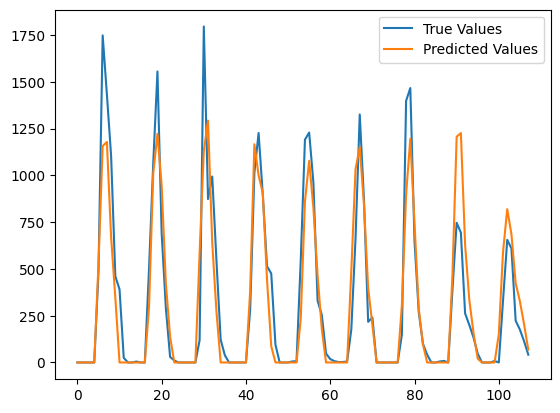

In [56]:
import matplotlib.pyplot as plt
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Values')
plt.plot(scaler.inverse_transform(predictions.reshape(-1, 1)), label='Predicted Values')

plt.legend()
plt.show()


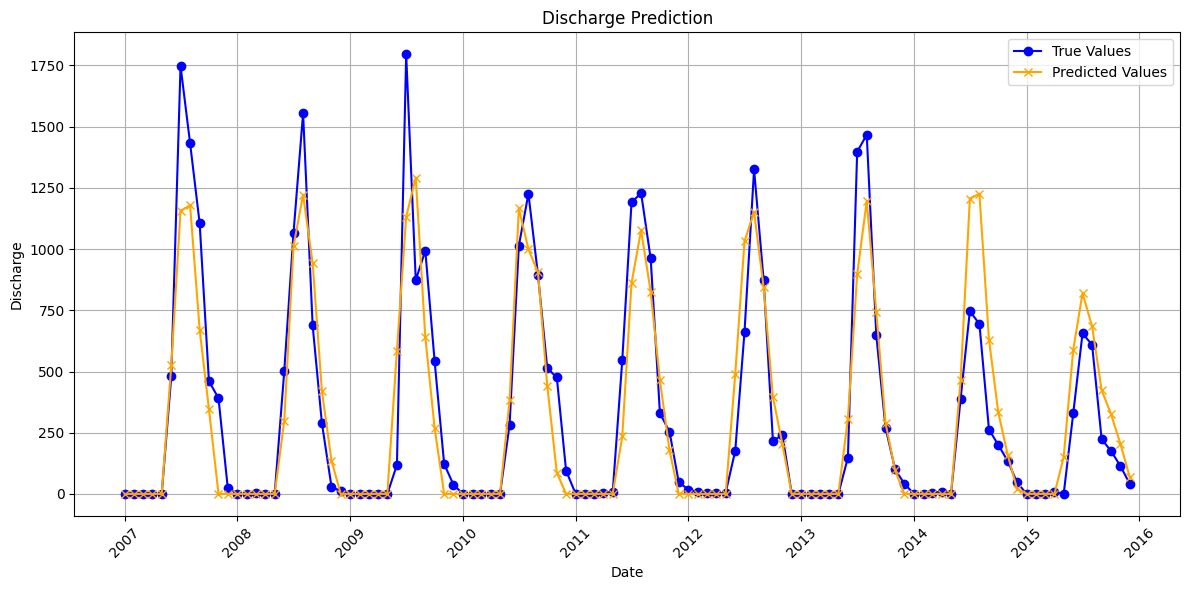

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Inverse transform y_test and predictions to get actual discharge values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_actual = scaler.inverse_transform(predictions.reshape(-1, 1))

# Convert date_test to a proper format if necessary
date_test = pd.to_datetime(date_test)

# Plot the actual and predicted values with dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test_actual, label='True Values', marker='o', color='blue')
plt.plot(date_test, predictions_actual, label='Predicted Values', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.title('Discharge Prediction')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()
plt.show()


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test_actual, predictions_actual)

# Calculate MSE
mse = mean_squared_error(y_test_actual, predictions_actual)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate NSE
numerator = np.sum((y_test_actual - predictions_actual) ** 2)
denominator = np.sum((y_test_actual - np.mean(y_test_actual)) ** 2)
nse = 1 - numerator / denominator

# Print metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"NSE: {nse}")


MAE: 115.91532897949219
MSE: 37975.22265625
RMSE: 194.87232971191406
NSE: 0.8227987885475159


In [59]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure the directory exists
output_dir = "/kaggle/working/predicted_yearly_plots/"
os.makedirs(output_dir, exist_ok=True)

# Inverse transform y_test and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_actual = scaler.inverse_transform(predictions.reshape(-1, 1))

# Convert date_test to datetime
date_test = pd.to_datetime(date_test)

# Combine the test data into a DataFrame for easier filtering
test_df = pd.DataFrame({
    'Date': date_test,
    'Actual': y_test_actual.flatten(),
    'Predicted': predictions_actual.flatten()
})
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month

# Loop through each year and create plots
for year in test_df['Year'].unique():
    year_data = test_df[test_df['Year'] == year]
    
    # Plot the comparison for this year
    plt.figure(figsize=(12, 6))
    plt.plot(year_data['Month'], year_data['Actual'], label='True Values', marker='o', color='blue')
    plt.plot(year_data['Month'], year_data['Predicted'], label='Predicted Values', marker='x', color='orange')
    plt.xlabel('Month')
    plt.ylabel('Discharge')
    plt.title(f'Discharge Prediction for {year}')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, 13))  # Months from 1 to 12
    plt.tight_layout()
    
    # Save the plot as an image with the year in the filename
    output_path = os.path.join(output_dir, f"{year}_discharge_plot.png")
    plt.savefig(output_path)
    plt.close()

print(f"Yearly plots saved in {output_dir}")


Yearly plots saved in /kaggle/working/predicted_yearly_plots/


In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 40)              │           6,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 40)              │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 12, 40)              │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 40)                  │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,925 (534.87 KB)

 Trainable params: 45,641 (178.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,284 (356.58 KB)

In [72]:
import pandas as pd
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import numpy as np

def autoregressor(df, model, prediction_year):
    predictions, dates = [], []
    latest_date = df['Date'].max()  # Get the latest date from the dataframe
    prediction_date = pd.to_datetime(prediction_year)  # Convert the target prediction year to datetime

    # Get the input for the model (streamflow data from the last 12 months)
    X = df[df['Date'] >= (latest_date - pd.DateOffset(months=12))]['Discharge'].to_numpy()
    X = X.reshape(1, -1, 1).astype(np.float32)  # Shape for LSTM: [batch_size, timesteps, features]

    # For prediction, predict step-by-step starting from the latest date
    while latest_date < prediction_date:
        # Use your model to predict the next value
        val = model.predict(X)  # Predict the next value
        val = float(val[0][0])  # Convert prediction to scalar

        # Store the prediction
        latest_date += relativedelta(months=1)
        dates.append(latest_date)
        predictions.append(val)

        # Update X: Remove the oldest timestep and add the new value
        # X = np.append(X[0, 1:, :], [[[val]]], axis=1).reshape(1, -1, 1)
        new_row = np.array([[[val]]], dtype=np.float32)  # Ensure 3D shape for the new value
        X = np.concatenate([X[:, 1:, :], new_row], axis=1)  # Concatenate along the second dimension (timesteps)


    # Create a DataFrame for predictions
    prediction_df = pd.DataFrame({
        'Date': dates,
        'Streamflow_predicted': scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    })
    return prediction_df


In [73]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('/kaggle/input/2015-nethravathi/Nethravathi Dataset-2015.xlsx')
df = df.sort_values('Date')
scaler = MinMaxScaler(feature_range=(0, 1))
df['Discharge'] = scaler.fit_transform(df['Streamflow (m3/s)'].values.reshape(-1, 1))
df.tail()

,Date,Rainfall (mm),Tmax_avg (oC),Tmin_avg (oC),T_mean (oC),Streamflow (m3/s),Discharge
547,2015-08-01,943.00,28.164516,20.925806,24.545161,609.26410,0.257826
548,2015-09-01,456.08,29.253333,20.733333,24.993333,223.14180,0.094428
549,2015-10-01,298.83,30.558065,20.561290,25.559677,176.04700,0.074499
550,2015-11-01,99.03,30.013333,19.933333,24.973333,113.43400,0.048003
551,2015-12-01,20.81,31.519355,18.593548,25.056452,41.39271,0.017516


In [74]:
from keras.models import load_model
prediction_year = '2025-01-01'
model = load_model('/kaggle/working/up_sample_nse2.h5')
predictions = autoregressor(df,model,prediction_year)

# Print predictions
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

In [64]:
predictions.head(20)

,Date,Streamflow_predicted
0,2016-01-01,0.000000
1,2016-02-01,0.000000
2,2016-03-01,0.000000
3,2016-04-01,0.000000
4,2016-05-01,0.000000
5,2016-06-01,44.462567
6,2016-07-01,548.442599
7,2016-08-01,741.540595
8,2016-09-01,471.544590
9,2016-10-01,103.273337


In [75]:
import os
directory = "/kaggle/working/Predictions_autoreg"
file_path = os.path.join(directory, "predictions15-02.csv")

# Create the directory if it does not exist
os.makedirs(directory, exist_ok=True)
predictions.to_csv(file_path, index=False)

In [66]:
predictions.head(50)

,Date,Streamflow_predicted
0,2016-01-01,0.000000
1,2016-02-01,0.000000
2,2016-03-01,0.000000
3,2016-04-01,0.000000
4,2016-05-01,0.000000
5,2016-06-01,44.462567
6,2016-07-01,548.442599
7,2016-08-01,741.540595
8,2016-09-01,471.544590
9,2016-10-01,103.273337


In [76]:
import pandas as pd

# Load the dataset
file_path = "/kaggle/input/nethravathi-dataset-new/Nethravathi Dataset.xlsx"
df = pd.read_excel(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where Date > '2016-01-01'
filtered_df = df[df['Date'] >='2016-01-01']

# Display the filtered data
print(filtered_df)


          Date  Rainfall (mm)  Tmax_avg (oC)  Tmin_avg (oC)  T_mean (oC)  \
552 2016-01-01          28.37      31.287097      16.606452    23.946774   
553 2016-02-01          39.20      32.613793      18.406897    25.510345   
554 2016-03-01          41.29      34.329032      20.900000    27.614516   
555 2016-04-01         110.49      35.090000      22.600000    28.845000   
556 2016-05-01         108.03      33.335484      22.632258    27.983871   
..         ...            ...            ...            ...          ...   
655 2024-08-01            NaN            NaN            NaN          NaN   
656 2024-09-01            NaN            NaN            NaN          NaN   
657 2024-10-01            NaN            NaN            NaN          NaN   
658 2024-11-01            NaN            NaN            NaN          NaN   
659 2024-12-01            NaN            NaN            NaN          NaN   

     Streamflow (m3/s)  
552             0.0000  
553             0.0000  
554         

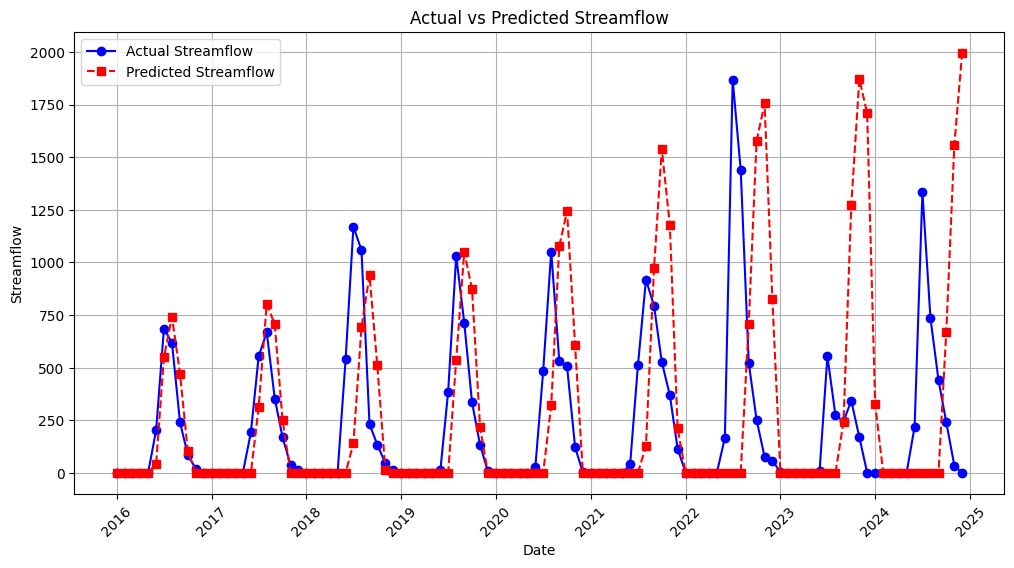

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the actual dataset
file_path = "/kaggle/input/nethravathi-dataset-new/Nethravathi Dataset.xlsx"
df = pd.read_excel(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where Date >= '2016-01-01'
filtered_df = df[df['Date'] >= '2016-01-01'].copy()

# Rename 'Streamflow (m3/s)' column for clarity
filtered_df['Streamflow_actual'] = filtered_df['Streamflow (m3/s)']

# Select only necessary columns
filtered_df = filtered_df[['Date', 'Streamflow_actual']]

# Load the prediction dataset (modify path if needed)
prediction_df = pd.read_csv("/kaggle/working/Predictions_autoreg/predictions15-02.csv")  # Adjust filename as needed

# Convert 'Date' to datetime in prediction_df
prediction_df['Date'] = pd.to_datetime(prediction_df['Date'])

# Ensure the predicted streamflow column exists
if 'Streamflow_predicted' not in prediction_df.columns:
    print("Error: Column 'Streamflow_predicted' not found in prediction_df. Please check column names.")

# Merge on 'Date' to compare streamflow values
comparison_df = filtered_df.merge(prediction_df, on="Date", suffixes=('_actual', '_predicted'))

# Plotting the comparison
plt.figure(figsize=(12, 6))

plt.plot(comparison_df['Date'], comparison_df['Streamflow_actual'], label="Actual Streamflow", color='blue', linestyle='-', marker='o')
plt.plot(comparison_df['Date'], comparison_df['Streamflow_predicted'], label="Predicted Streamflow", color='red', linestyle='--', marker='s')

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.title("Actual vs Predicted Streamflow")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()


In [78]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to calculate NSE (Nash-Sutcliffe Efficiency)
def nse(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

# Load the actual dataset
file_path = "/kaggle/input/nethravathi-dataset-new/Nethravathi Dataset.xlsx"
df = pd.read_excel(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where Date >= '2016-01-01'
filtered_df = df[df['Date'] >= '2016-01-01'].copy()
filtered_df['Streamflow_actual'] = filtered_df['Streamflow (m3/s)']
filtered_df = filtered_df[['Date', 'Streamflow_actual']]

# Load the prediction dataset
prediction_df = pd.read_csv("/kaggle/working/Predictions_autoreg/predictions15-02.csv")  # Adjust filename as needed
prediction_df['Date'] = pd.to_datetime(prediction_df['Date'])

# Ensure the predicted streamflow column exists
if 'Streamflow_predicted' not in prediction_df.columns:
    raise ValueError("Error: Column 'Streamflow_predicted' not found in prediction_df. Check column names.")

# Merge on 'Date'
comparison_df = filtered_df.merge(prediction_df, on="Date", suffixes=('_actual', '_predicted'))

# Extract Month & Year
comparison_df['Month'] = comparison_df['Date'].dt.to_period('M')  # Monthly grouping
comparison_df['Year'] = comparison_df['Date'].dt.to_period('Y')  # Yearly grouping

# Function to calculate MAE, NSE, and RMSE
def compute_metrics(df, time_column):
    grouped_metrics = []
    
    for period, group in df.groupby(time_column):
        y_true = group['Streamflow_actual'].values
        y_pred = group['Streamflow_predicted'].values
        
        if len(y_true) > 1:  # Ensure enough data points
            mae = mean_absolute_error(y_true, y_pred)
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            nse_score = nse(y_true, y_pred)
            grouped_metrics.append([period, mae, rmse, nse_score])
    
    return pd.DataFrame(grouped_metrics, columns=[time_column, 'MAE', 'RMSE', 'NSE'])

# Compute monthly metrics
monthly_metrics = compute_metrics(comparison_df, 'Month')

# Compute yearly metrics
yearly_metrics = compute_metrics(comparison_df, 'Year')

# Display results
print("\nPerformance Metrics per Month:\n", monthly_metrics)
print("\nPerformance Metrics per Year:\n", yearly_metrics)



Performance Metrics per Month:
 Empty DataFrame
Columns: [Month, MAE, RMSE, NSE]
Index: []

Performance Metrics per Year:
    Year         MAE        RMSE        NSE
0  2016   57.135932   97.034038   0.832030
1  2017   87.955090  143.143248   0.600141
2  2018  255.757875  421.589845  -0.064271
3  2019  154.950774  258.722839   0.372205
4  2020  250.849796  391.814862  -0.442936
5  2021  286.253197  465.863875  -1.051027
6  2022  619.272386  948.027751  -1.487081
7  2023  432.351665  767.231570 -17.796021
8  2024  583.840051  873.592978  -3.898839


<ipython-input-79-ee2a666e3f7b>:8: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
<ipython-input-79-ee2a666e3f7b>:8: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
<ipython-input-79-ee2a666e3f7b>:8: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
<ipython-input-79-ee2a666e3f7b>:8: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))



Performance Over Time (Monthly Evaluation After Prediction Start):
    Evaluation Date        MAE        RMSE       NSE
0       2016-02-01   0.000000    0.000000       NaN
1       2016-03-01   0.000000    0.000000       NaN
2       2016-04-01   0.000000    0.000000       NaN
3       2016-05-01   0.000000    0.000000       NaN
4       2016-06-01  26.396506   64.657970  0.268419
5       2016-07-01  42.125391   79.026048  0.890077
6       2016-08-01  52.260154   85.801307  0.903305
7       2016-09-01  72.136580  111.716063  0.816312
8       2016-10-01  66.698625  106.131814  0.818936
9       2016-11-01  62.330108  101.348747  0.825291
10      2016-12-01  57.135932   97.034038  0.832030
11      2017-01-01  52.740861   93.227288  0.837339


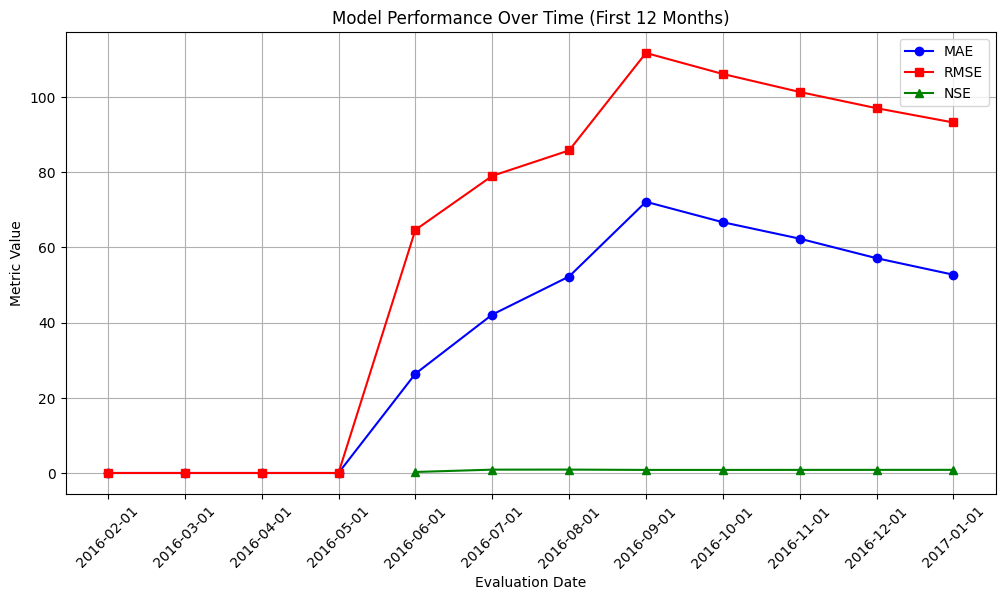

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to calculate NSE (Nash-Sutcliffe Efficiency)
def nse(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

# Load the actual dataset
file_path = "/kaggle/input/nethravathi-dataset-new/Nethravathi Dataset.xlsx"
df = pd.read_excel(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where Date >= '2016-01-01'
filtered_df = df[df['Date'] >= '2016-01-01'].copy()
filtered_df['Streamflow_actual'] = filtered_df['Streamflow (m3/s)']
filtered_df = filtered_df[['Date', 'Streamflow_actual']]

# Load the prediction dataset
prediction_df = pd.read_csv("/kaggle/working/Predictions_autoreg/predictions15-02.csv")  # Adjust filename as needed
prediction_df['Date'] = pd.to_datetime(prediction_df['Date'])

# Merge on 'Date'
comparison_df = filtered_df.merge(prediction_df, on="Date", suffixes=('_actual', '_predicted'))

# Define evaluation time points (every 1st of the month from 2016-02-01 to 2016-12-01)
start_date = pd.to_datetime('2016-01-01')
evaluation_dates = [start_date + pd.DateOffset(months=i) for i in range(1, 13)]  # From Feb to Dec

# Store performance metrics
performance_results = []

# Compute metrics for each evaluation date
for eval_date in evaluation_dates:
    # Select data up to the current evaluation date
    eval_df = comparison_df[comparison_df['Date'] <= eval_date]
    
    if len(eval_df) > 1:  # Ensure enough data points
        y_true = eval_df['Streamflow_actual'].values
        y_pred = eval_df['Streamflow_predicted'].values

        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        nse_score = nse(y_true, y_pred)

        performance_results.append([eval_date.strftime('%Y-%m-%d'), mae, rmse, nse_score])

# Convert results to DataFrame
performance_df = pd.DataFrame(performance_results, columns=['Evaluation Date', 'MAE', 'RMSE', 'NSE'])

# Print performance table
print("\nPerformance Over Time (Monthly Evaluation After Prediction Start):\n", performance_df)

# Plot Performance Metrics Over Time
plt.figure(figsize=(12, 6))
plt.plot(performance_df['Evaluation Date'], performance_df['MAE'], label="MAE", marker='o', color='blue')
plt.plot(performance_df['Evaluation Date'], performance_df['RMSE'], label="RMSE", marker='s', color='red')
plt.plot(performance_df['Evaluation Date'], performance_df['NSE'], label="NSE", marker='^', color='green')

# Formatting the plot
plt.xlabel("Evaluation Date")
plt.ylabel("Metric Value")
plt.title("Model Performance Over Time (First 12 Months)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()
